In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

# Machine learning and text data

If we have a corpus of texts, we first must preprocess those texts into a format the algorithms can understand. This usually means converting the representation of our text into numbers!

# Bag of words model

A bag of words model classifies a text by turning it into a "bag" of words to normalize and count them. Scikit-learn's `CountVectorizer` function helps us do this.

# CountVectorizer

`CountVectorizer` will help us quickly tokenize text, learn its vocabulary, and encode the text as a vector for use in machine learning. This is often referred to as document encoding. 

In [123]:
# Define a corpus
corpus = [
    "This is the first document.",
    "This is the second document.",
    "And the third one.",
    "Here we go with the fourth document?"
    ]

# Define an empty bag (of words)
vectorizer = CountVectorizer()

# Use the .fit method to tokenize the text and learn the vocabulary
vectorizer.fit(corpus)

# Print the vocabulary
vectorizer.vocabulary_

{'this': 11,
 'is': 6,
 'the': 9,
 'first': 2,
 'document': 1,
 'second': 8,
 'and': 0,
 'third': 10,
 'one': 7,
 'here': 5,
 'we': 12,
 'go': 4,
 'with': 13,
 'fourth': 3}

Our output is a dictionary. What are the keys and values? 

# Document term matrix

A [document term matrix](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) displays term frequencies that occur across a collection of documents. We want to encode the documents into a [sparse matrix](https://sebastianraschka.com/faq/docs/bag-of-words-sparsity.html#:~:text=By%20definition%2C%20a%20sparse%20matrix,as%20a%20word%2Dcount%20vector.&text=Thus%2C%20if%20most%20of%20your,most%20likely%20sparse%20as%20well!) to represent the frequencies of each vocabulary word across the documents.

The column headers could read **(document number, vocabulary word)   frequency**

In [124]:
# Encode the documents
vector = vectorizer.transform(corpus)
print(vector) # 4 x 9 sparse matrix - four documents with nine words across them!
print(vector.shape)
print(type(vector))

  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (0, 9)	1
  (0, 11)	1
  (1, 1)	1
  (1, 6)	1
  (1, 8)	1
  (1, 9)	1
  (1, 11)	1
  (2, 0)	1
  (2, 7)	1
  (2, 9)	1
  (2, 10)	1
  (3, 1)	1
  (3, 3)	1
  (3, 4)	1
  (3, 5)	1
  (3, 9)	1
  (3, 12)	1
  (3, 13)	1
(4, 14)
<class 'scipy.sparse.csr.csr_matrix'>


In [125]:
# View the vector as arrays (4 x 9). Nice!!
# Each row is a document
# Each column is a vocabulary word (0 thru 8)
print(vector.toarray())

[[0 1 1 0 0 0 1 0 0 1 0 1 0 0]
 [0 1 0 0 0 0 1 0 1 1 0 1 0 0]
 [1 0 0 0 0 0 0 1 0 1 1 0 0 0]
 [0 1 0 1 1 1 0 0 0 1 0 0 1 1]]


In [126]:
# Look at the arrays in the above cell. 
# In which documents does "and" appear? 
# What about "document"? What about "the"?
vectorizer.get_feature_names()

['and',
 'document',
 'first',
 'fourth',
 'go',
 'here',
 'is',
 'one',
 'second',
 'the',
 'third',
 'this',
 'we',
 'with']

In [127]:
# What does this tell us? 
vectorizer.transform(['my new document is this']).toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]])

# Bigrams

In addition to uni-grams, using bigrams can be useful to preserve some ordering information. Here we can look at two (bi) or three (tri) or four (quad) or more words at a time! 

> NOTE: **`ngram_range=(1,2)`** will get you bigrams, **`ngram_range=(1,3)`** will get you tri-grams, **`ngram_range=(1,4)`** will get you quad-grams, etc. 

> **`token_pattern=r'\b\w+\b'`** is standard regex code to separate words.

We could also add many other parameters, such as `stop_words='english'` to add a stopwords list.

In [133]:
# Define a bigram bag of words 
bigram_vectorizer = CountVectorizer(ngram_range = (1,2),
                                    token_pattern = r'\b\w+\b')
bigram_vectorizer

CountVectorizer(ngram_range=(1, 2), token_pattern='\\b\\w+\\b')

In [134]:
# Analyze the bigram bag of words
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams. Are cool!')

['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool']

# Apply this idea to our `corpus` variable from above

In [135]:
corpus

['This is the first document.',
 'This is the second document.',
 'And the third one.',
 'Here we go with the fourth document?']

In [136]:
# Corpus transformation
x = bigram_vectorizer.fit_transform(corpus).toarray()
print(x)

[[0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1]]


In [137]:
# What are feature names? The column names! The rows are our documents :) 
print(bigram_vectorizer.get_feature_names())

['and', 'and the', 'document', 'first', 'first document', 'fourth', 'fourth document', 'go', 'go with', 'here', 'here we', 'is', 'is the', 'one', 'second', 'second document', 'the', 'the first', 'the fourth', 'the second', 'the third', 'third', 'third one', 'this', 'this is', 'we', 'we go', 'with', 'with the']


In [138]:
# Note that these counts are not word counts, but refer to the index of the word in the vocab
bigram_vectorizer.vocabulary_

{'this': 23,
 'is': 11,
 'the': 16,
 'first': 3,
 'document': 2,
 'this is': 24,
 'is the': 12,
 'the first': 17,
 'first document': 4,
 'second': 14,
 'the second': 19,
 'second document': 15,
 'and': 0,
 'third': 21,
 'one': 13,
 'and the': 1,
 'the third': 20,
 'third one': 22,
 'here': 9,
 'we': 25,
 'go': 7,
 'with': 27,
 'fourth': 5,
 'here we': 10,
 'we go': 26,
 'go with': 8,
 'with the': 28,
 'the fourth': 18,
 'fourth document': 6}

In [155]:
# Finding out which document this vocabulary word appears in
feature_index = bigram_vectorizer.vocabulary_.get('fourth document')
x[:,feature_index] # using comma in slicing to extract a specific column from a 2D array

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1]])

# Document encoding / machine learning (continued)

[Term frequency–inverse document frequency (TFIDF)](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) can be thought of as an extension of `CountVectorizer`. However, instead of counting words, TFIDF identifies unique words within and across documents. 

# Vocabulary
- **Document Term Matrix:** Is a matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.

- **TF-IDF Scores:** Short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

- **Topic Modeling:** A general class of statistical models that uncover abstract topics within a text. It uses the co-occurrence of words within documents, compared to their distribution across documents, to uncover these abstract themes. The output is a list of weighted words, which indicate the subject of each topic, and a weight distribution across topics for each document.
    
- **LDA:** Latent Dirichlet Allocation. A particular model for topic modeling. It does not take document order into account, unlike other topic modeling algorithms. Also see word2vec and BERT! (Week 5)

# DTM/TF-IDF

- Let's use Python's scikit-learn package to make a document term matrix from the dataset `music_reviews.csv` (collected from [Metacritic](https://www.metacritic.com/)). We will then use the DTM and a word weighting technique called TF-IDF (term frequency inverse document frequency) to identify important and discerning words within this dataset with Pandas.

We ask the question: **what words distinguish reviews of Rap albums, Indie Rock albums, and Jazz albums?**

In [78]:
reviews = pd.read_csv("../../Data/music_reviews.csv", sep = "\t")
reviews.head()

album           artist     genre         release_date  \
0              Don't Panic     All Time Low  Pop/Rock  2012-10-09 00:00:00   
1  Fear and Saturday Night     Ryan Bingham   Country  2015-01-20 00:00:00   
2       The Way I'm Livin'   Lee Ann Womack   Country  2014-09-23 00:00:00   
3                    Doris  Earl Sweatshirt       Rap  2013-08-20 00:00:00   
4                  Giraffe          Echoboy      Rock  2003-02-25 00:00:00   

       critic  score                                               body  
0    Kerrang!   74.0  While For Baltimore proves they can still writ...  
1       Uncut   70.0  There's nothing fake about the purgatorial nar...  
2  Q Magazine   84.0  All life's disastrous lows are here on a caree...  
3   Pitchfork   82.0  With Doris, Odd Future’s Odysseus is finally b...  
4    AllMusic   71.0  Though Giraffe is definitely Echoboy's most im...

# Review - Explore the Data with Pandas

Let's first explore the data. This serves not only as a basic informative purpose, but also to ensure there are not any glaring errors. 

First, what genres are in this dataset, and how many reviews in each genre?

In [79]:
reviews['genre'].value_counts()

Pop/Rock                  1486
Indie                     1115
Rock                       932
Electronic                 513
Rap                        363
Pop                        149
Country                    140
R&B;                       112
Folk                        70
Alternative/Indie Rock      42
Dance                       41
Jazz                        38
Name: genre, dtype: int64

In [80]:
# Who were the artists?
reviews.artist.value_counts().head(20)

# or

# reviews['artist'].value_counts().head(20)

Various Artists      22
R.E.M.               16
Arcade Fire          14
Sigur Rós            13
Belle & Sebastian    12
Brian Eno            11
Mogwai               10
Bob Dylan            10
The Raveonettes      10
Low                  10
Kings of Leon        10
Radiohead            10
LCD Soundsystem      10
Weezer               10
Eels                  9
Los Campesinos!       9
M. Ward               9
Franz Ferdinand       9
Wilco                 9
Ghostface Killah      9
Name: artist, dtype: int64

In [16]:
# Who were the reviewers?
reviews['critic'].value_counts().head(20)

AllMusic                     282
PopMatters                   228
Pitchfork                    207
Q Magazine                   178
Uncut                        171
Mojo                         137
Drowned In Sound             132
New Musical Express (NME)    127
The A.V. Club                121
Rolling Stone                112
Under The Radar              100
Spin                          97
The Guardian                  96
musicOMH.com                  88
Entertainment Weekly          87
Slant Magazine                83
Paste Magazine                72
Alternative Press             69
Consequence of Sound          69
Prefix Magazine               68
Name: critic, dtype: int64

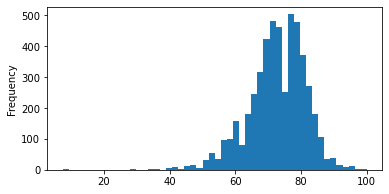

In [17]:
# What was the distribution of review scores like?
reviews['score'].plot(kind='hist', 
                      bins = 50, 
                      figsize = (6, 3)); 

In [18]:
# View average score by genre
reviews_grouped_by_genre = reviews.groupby("genre")
# print(reviews_grouped_by_genre)
reviews_grouped_by_genre['score'].mean().sort_values(ascending=False)

genre
Jazz                      77.631579
Folk                      75.900000
Indie                     74.400897
Country                   74.071429
Alternative/Indie Rock    73.928571
Electronic                73.140351
Pop/Rock                  73.033782
R&B;                      72.366071
Rap                       72.173554
Rock                      70.754292
Dance                     70.146341
Pop                       64.608054
Name: score, dtype: float64

Together, let's make barplots for the number of reviews by genre.

In [19]:
# Get frequencies (counts) for the number of reviews by genre
reviews["genre"].value_counts()

Pop/Rock                  1486
Indie                     1115
Rock                       932
Electronic                 513
Rap                        363
Pop                        149
Country                    140
R&B;                       112
Folk                        70
Alternative/Indie Rock      42
Dance                       41
Jazz                        38
Name: genre, dtype: int64

In [20]:
# Convert this to a data frame
gen = pd.DataFrame(reviews["genre"].value_counts())
gen = gen.reset_index()
gen

index  genre
0                 Pop/Rock   1486
1                    Indie   1115
2                     Rock    932
3               Electronic    513
4                      Rap    363
5                      Pop    149
6                  Country    140
7                     R&B;    112
8                     Folk     70
9   Alternative/Indie Rock     42
10                   Dance     41
11                    Jazz     38

In [21]:
# Check out the new column names
list(gen.columns)

['index', 'genre']

In [22]:
# Rename these columns
gen = gen.rename(columns = {"index":"GENRE", "genre":"COUNT"})
gen

GENRE  COUNT
0                 Pop/Rock   1486
1                    Indie   1115
2                     Rock    932
3               Electronic    513
4                      Rap    363
5                      Pop    149
6                  Country    140
7                     R&B;    112
8                     Folk     70
9   Alternative/Indie Rock     42
10                   Dance     41
11                    Jazz     38

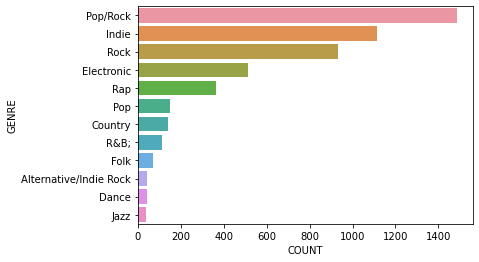

In [23]:
# Create the plot
gen_fig = sns.barplot(x = 'COUNT', 
                      y = 'GENRE', 
                      data = gen, 
                      orient = 'h')

We could also make barplots for average review score by genre and boxplots for the review scores by genre. 

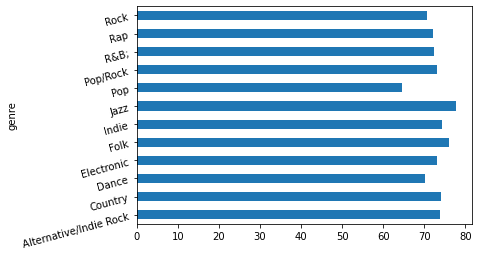

In [24]:
mean_review = reviews.groupby('genre')['score'].mean()
mean_review.plot.barh(rot = 15);

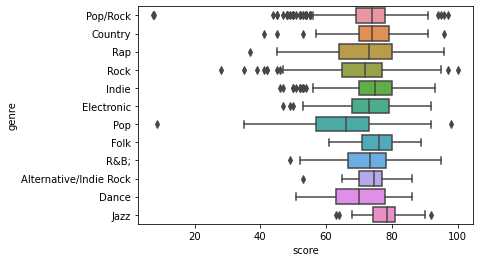

In [25]:
# Boxplots of average score by genre
sns.boxplot(x = "score", y = "genre", data = reviews);

# Wait, so what about TF-IDF?

Now that we have a sense of how these albums were scored by genre we can take a look at the language of the reviews themselves to see how those words might relate to the album scores!

> NOTE: remember that exploring your data with basic summary statistics and visualizations is a good first step before anything more complex!

In [81]:
# What is going on here?
def remove_digits(comment):
    return ''.join([ch for ch in comment if not ch.isdigit()])

reviews['body_without_digits'] = reviews['body'].apply(remove_digits)

In [82]:
reviews

album  \
0                                           Don't Panic   
1                               Fear and Saturday Night   
2                                    The Way I'm Livin'   
3                                                 Doris   
4                                               Giraffe   
5                                          Weathervanes   
6                                  Build a Rocket Boys!   
7                                    Ambivalence Avenue   
8                                               Wavvves   
9                                        Peachtree Road   
10                                             Heritage   
11                                          White Chalk   
12                                  Tyrannosaurus Hives   
13                                           JackInABox   
14                                          Liquid Love   
15                                The  Truth About Love   
16                                          The Monitor   
17                                       Ones and Sixes   
18                      In Search Of... [First Version]   
19                                          Tarot Sport   
20                                           July Flame   
21                                                  Lux   
22                                  Live At The Olympia   
23                                   Ten Thousand Fists   
24                                           New Danger   
25                                                  NYC   
26                               Hold On Now, Youngster   
27                                     Tiny Rebels [EP]   
28                                     Wavering Radiant   
29                                        Sound Mirrors   
30                     Girls in Peacetime Want to Dance   
31                                                45:33   
32                                     Swings Both Ways   
33                                                 Kala   
34                                     Fork In The Road   
35                                   Two Against Nature   
36                                  The Duke & the King   
37                                       Girls Can Tell   
38                                          The  Valley   
39                                        Sound Mirrors   
40                                            Creatures   
41                                          Black Noise   
42                                   Everywhere At Once   
43                                            Geronimo!   
44                                           King Night   
45                                    The Miner's Hymns   
46                                                April   
47                                  The Great Misdirect   
48                                         Femme Fatale   
49                          From A Basement On The Hill   
50                                         Cool Choices   
51                                             Shady XV   
52                                  The Devil, You + Me   
53                                      Blood Red Shoes   
54                                          Dream River   
55                                      Stephen Malkmus   
56                     Ray Guns Are Not Just The Future   
57                                        Punish, Honey   
58                                Prisoner of Conscious   
59                                    The Ganzfeld [EP]   
60                                      Angels & Devils   
61               Heat Lightning Rumbles in the Distance   
62                                        I Look To You   
63                                            Hold Time   
64                                     Seasons on Earth   
65                                              The Con   
66                                              Gist Is   
67                                    

In [83]:
# View the first body entry
list(reviews["body"])[0]

'While For Baltimore proves they can still write a grade A banger when they put their mind to it, too many songs are destined to have "must try harder" stamped on their report card. [13 Oct 2012, p.52]'

In [84]:
# View that same body entry - but without digits! What happened?
list(reviews["body_without_digits"])[0]

'While For Baltimore proves they can still write a grade A banger when they put their mind to it, too many songs are destined to have "must try harder" stamped on their report card. [ Oct , p.]'

# `CountVectorizer` revisited

Let's revisit `CountVectorizer` and see what kind of vocabulary we are dealing with in the music reviews "body_without_digits" column. Whoa, that is a lot of words!

In [85]:
countvec = CountVectorizer()
sparse_dtm = countvec.fit_transform(reviews['body_without_digits'])
print(sparse_dtm)

  (0, 15752)	1
  (0, 5484)	1
  (0, 1022)	1
  (0, 10931)	1
  (0, 14300)	2
  (0, 1963)	1
  (0, 13493)	1
  (0, 15995)	1
  (0, 6088)	1
  (0, 1034)	1
  (0, 15740)	1
  (0, 11042)	1
  (0, 14257)	2
  (0, 8941)	1
  (0, 14495)	2
  (0, 7398)	1
  (0, 14542)	1
  (0, 8536)	1
  (0, 13062)	1
  (0, 671)	1
  (0, 3662)	1
  (0, 6417)	1
  (0, 9277)	1
  (0, 14799)	1
  (0, 6358)	1
  :	:
  (5000, 9722)	1
  (5000, 14243)	1
  (5000, 9663)	1
  (5000, 744)	1
  (5000, 480)	3
  (5000, 15940)	1
  (5000, 14237)	1
  (5000, 828)	1
  (5000, 14500)	1
  (5000, 15882)	1
  (5000, 9134)	1
  (5000, 13040)	1
  (5000, 9261)	1
  (5000, 1202)	1
  (5000, 14110)	1
  (5000, 5168)	1
  (5000, 12918)	1
  (5000, 9821)	1
  (5000, 10844)	1
  (5000, 13381)	1
  (5000, 11414)	1
  (5000, 4724)	1
  (5000, 12068)	1
  (5000, 4803)	1
  (5000, 3900)	1


This format is actually called Compressed Sparse Format and is useful because we can save huge document term matrices in this format - but it is difficult to look at for a human. Let's convert it to a format we are more familiar with - a data frame:

In [86]:
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=reviews.index)
print(dtm.shape)

# Whaaaaaaaaaaaat is going on?
dtm.head(n = 5)

(5001, 16139)


/Users/tomvannuenen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa  aaaa  aahs  aaliyah  aaron  ab  abandon  abandoned  abandoning  abc  \
0   0     0     0        0      0   0        0          0           0    0   
1   0     0     0        0      0   0        0          0           0    0   
2   0     0     0        0      0   0        0          0           0    0   
3   0     0     0        0      0   0        0          0           0    0   
4   0     0     0        0      0   0        0          0           0    0   

   ...  zone  zones  zoo  zooey  zoomer  zu  zydeco  álbum  être  über  
0  ...     0      0    0      0       0   0       0      0     0     0  
1  ...     0      0    0      0       0   0       0      0     0     0  
2  ...     0      0    0      0       0   0       0      0     0     0  
3  ...     0      0    0      0       0   0       0      0     0     0  
4  ...     0      0    0      0       0   0       0      0     0     0  

[5 rows x 16139 columns]

In [87]:
# Look at just the first row in its entirety
dtm.iloc[0]

aa                      0
aaaa                    0
aahs                    0
aaliyah                 0
aaron                   0
ab                      0
abandon                 0
abandoned               0
abandoning              0
abc                     0
abdullah                0
abe                     0
aberrant                0
abhorrent               0
abides                  0
abilities               0
ability                 0
ablaze                  0
able                    0
ably                    0
abortively              0
abound                  0
abounds                 0
about                   0
aboutsonic              0
above                   0
abovei                  0
abrasive                0
abrupt                  0
absence                 0
absenceit               0
absent                  0
absolute                0
absolutely              0
absolution              0
absorb                  0
absorbed                0
absorbing               0
absorbs     

In [88]:
# How about....
# Now do a command + f / control + f search for the number 1
pd.set_option('display.max_rows', None)
dtm.iloc[0]

aa                      0
aaaa                    0
aahs                    0
aaliyah                 0
aaron                   0
ab                      0
abandon                 0
abandoned               0
abandoning              0
abc                     0
abdullah                0
abe                     0
aberrant                0
abhorrent               0
abides                  0
abilities               0
ability                 0
ablaze                  0
able                    0
ably                    0
abortively              0
abound                  0
abounds                 0
about                   0
aboutsonic              0
above                   0
abovei                  0
abrasive                0
abrupt                  0
absence                 0
absenceit               0
absent                  0
absolute                0
absolutely              0
absolution              0
absorb                  0
absorbed                0
absorbing               0
absorbs     

# What can we do with a DTM?

In [34]:
# Quickly identify the most frequent words:
dtm.sum().sort_values(ascending=False).head(20)

the      7406
and      4557
of       4400
to       3175
is       2914
it       2608
that     2039
in       1775
album    1719
this     1518
but      1439
with     1367
as       1310
on       1139
for      1073
are       812
their     775
you       775
an        751
his       743
dtype: int64

In [89]:
# View the most infrequent words:
dtm.sum().sort_values().head(20)

sincerest       1
glyn            1
gluttonously    1
glue            1
glows           1
glowing         1
glowin          1
glowering       1
resorting       1
glossily        1
gloriously      1
glories         1
gloria          1
respectfully    1
globular        1
respectively    1
gloating        1
glo             1
glitz           1
glittery        1
dtype: int64

In [90]:
# View the average number of times each word is used in a review:
dtm.mean().sort_values(ascending=False).head(20)

the      1.480904
and      0.911218
of       0.879824
to       0.634873
is       0.582683
it       0.521496
that     0.407718
in       0.354929
album    0.343731
this     0.303539
but      0.287742
with     0.273345
as       0.261948
on       0.227754
for      0.214557
are      0.162368
their    0.154969
you      0.154969
an       0.150170
his      0.148570
dtype: float64

# TF-IDF scores

How to find distinctive words in a corpus is a long-standing question in text analysis. Today, we'll learn one simple approach to this: TF-IDF. The idea behind words scores is to weight words not just by their frequency, but by their frequency in one document compared to their distribution across all documents. Words that are frequent, but are also used in every single document, will not be distinguishing. We want to identify words that are unevenly distributed across the corpus using TF-IDF. By offsetting the frequency of a word by its document frequency (the number of documents in which it appears) will in theory filter out common terms such as 'the', 'of', and 'and'.

Traditionally, the inverse document frequency is calculated as such:

**number_of_documents / number_documents_with_term**

so:

**tfidf_word1 = word1_frequency_document1 * (number_of_documents / number_document_with_word1)**

You can, and often should, normalize the numerator: 

**tfidf_word1 = (word1_frequency_document1 / word_count_document1) * (number_of_documents / number_document_with_word1)**

We can calculate this manually, but scikit-learn has a built-in function to do so. This function also uses log frequencies, so the numbers will not correspond excactly to the calculations above. We'll use the [scikit-learn calculation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). 

# TF-IDFVectorizer Function

To do so, we simply do the same thing we did before with `CountVectorizer`, but instead we use the function `TfidfVectorizer`

In [91]:
tfidfvec = TfidfVectorizer()
sparse_tfidf = tfidfvec.fit_transform(reviews['body_without_digits'])
print(sparse_tfidf)

  (0, 9643)	0.15555018621777542
  (0, 2011)	0.27355588855660057
  (0, 11604)	0.2609865591283227
  (0, 9722)	0.08451692318597409
  (0, 13369)	0.27355588855660057
  (0, 6358)	0.21801173796360837
  (0, 14799)	0.19174569011359038
  (0, 9277)	0.19065786689536357
  (0, 6417)	0.1054519845331648
  (0, 3662)	0.2520684779742434
  (0, 671)	0.09503119655857208
  (0, 13062)	0.101717209548892
  (0, 8536)	0.14663210506369612
  (0, 14542)	0.12855469810854508
  (0, 7398)	0.06416464283340075
  (0, 14495)	0.11877201113147984
  (0, 8941)	0.16970959652286888
  (0, 14257)	0.19462697261324438
  (0, 11042)	0.17138566852469547
  (0, 15740)	0.12812513307304502
  (0, 1034)	0.2609865591283227
  (0, 6088)	0.2609865591283227
  (0, 15995)	0.19922166098535254
  (0, 13493)	0.1181241325654472
  (0, 1963)	0.11731097694158929
  :	:
  (5000, 4803)	0.2668192493077923
  (5000, 12068)	0.2668192493077923
  (5000, 4724)	0.2274450283993655
  (5000, 11414)	0.2707156016919672
  (5000, 13381)	0.23148334312230978
  (5000, 10844)	0.

Turn this into a Pandas DataFrame: 

In [92]:
tfidf = pd.DataFrame(sparse_tfidf.toarray(), columns=tfidfvec.get_feature_names(), index=reviews.index)
tfidf.head(n = 50)

/Users/tomvannuenen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa  aaaa  aahs  aaliyah  aaron   ab  abandon  abandoned  abandoning  abc  \
0   0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
1   0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
2   0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
3   0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
4   0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
5   0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
6   0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
7   0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
8   0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
9   0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
10  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
11  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
12  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
13  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
14  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
15  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
16  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
17  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
18  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
19  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
20  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
21  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
22  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
23  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
24  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
25  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
26  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
27  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
28  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
29  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
30  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
31  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
32  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
33  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
34  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
35  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
36  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
37  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
38  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
39  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
40  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
41  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
42  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
43  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
44  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
45  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
46  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
47  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
48  0.0   0.0   0.0      0.0    0.0 

In [93]:
# Look at the 20 words with highest tf-idf weights:
tfidf.max().sort_values(ascending=False).head(20)

pppperfect    1.000000
awesome       1.000000
stars         1.000000
brill         1.000000
yummy         1.000000
wonderfull    1.000000
perfect       1.000000
meh           1.000000
subpar        0.959257
ga            0.908259
masterful     0.898620
grower        0.888624
likable       0.867803
acirc         0.867003
great         0.864253
infectious    0.859996
blank         0.854475
thrilling     0.848810
smart         0.847852
stuff         0.834479
dtype: float64

Ok! We have successfully identified content words, without removing stop words. What else do you notice about this list?

# Identifying Distinctive Words

What can we do with this? These scores are best used when you want to identify distinctive words for individual documents, or groups of documents, compared to other groups or the corpus as a whole. To illustrate this, let's compare three genres and identify the most distinctive words by genre.

First we add in a column of genre: 

In [94]:
tfidf['genre_'] = reviews['genre']
tfidf.head()

aa  aaaa  aahs  aaliyah  aaron   ab  abandon  abandoned  abandoning  abc  \
0  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
1  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
2  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
3  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   
4  0.0   0.0   0.0      0.0    0.0  0.0      0.0        0.0         0.0  0.0   

   ...  zones  zoo  zooey  zoomer   zu  zydeco  álbum  être  über    genre_  
0  ...    0.0  0.0    0.0     0.0  0.0     0.0    0.0   0.0   0.0  Pop/Rock  
1  ...    0.0  0.0    0.0     0.0  0.0     0.0    0.0   0.0   0.0   Country  
2  ...    0.0  0.0    0.0     0.0  0.0     0.0    0.0   0.0   0.0   Country  
3  ...    0.0  0.0    0.0     0.0  0.0     0.0    0.0   0.0   0.0       Rap  
4  ...    0.0  0.0    0.0     0.0  0.0     0.0    0.0   0.0   0.0      Rock  

[5 rows x 16140 columns]

Now lets compare the words with the highest tf-idf weight for each genre: 

In [95]:
rap = tfidf[tfidf['genre_'] == 'Rap']
indie = tfidf[tfidf['genre_'] == 'Indie']
jazz = tfidf[tfidf['genre_'] == 'Jazz']

In [96]:
rap.max(numeric_only=True).sort_values(ascending=False).head(10)

blank        0.854475
waste        0.755918
amiable      0.730963
awesomely    0.717079
joyless      0.687687
beastie      0.672439
same         0.672392
sucker       0.663760
vanguard     0.661978
tight        0.653993
dtype: float64

In [97]:
indie.max(numeric_only=True).sort_values(ascending=False).head(10)

pppperfect    1.000000
wonderfull    1.000000
perfect       1.000000
meh           1.000000
awesome       1.000000
yummy         1.000000
brill         1.000000
ga            0.908259
masterful     0.898620
likable       0.867803
dtype: float64

In [98]:
jazz.max(numeric_only=True).sort_values(ascending=False).head(10)

purely        0.544477
descending    0.519218
devotional    0.507724
recordings    0.499963
languid       0.487715
clarinet      0.479643
amidst        0.465227
duhnam        0.456224
carper        0.456224
apply         0.435261
dtype: float64

In week 5 you will learn about topic modeling to see how machines can identify potentially abstract topics in text(s)!